<h1>Geospatial Data Science</h1>
<h2>Geospatial Data Visualization: Bubble/Graduated Symbol Maps</h2>
<h3>IT University of Copenhagen, Spring 2023</h3>
<h3>Instructor: Ane Rahbek Vierø</h3>

Based on Abdishakur's workflow [How to create bubble maps in Python with Geospatial dataI](https://towardsdatascience.com/how-to-create-bubble-maps-in-python-with-geospatial-data-e51118c3d767i).

In [1]:
## Import libraries

import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt

## Read data

In [2]:
geoms = gpd.read_file("election_data/voting_areas.gpkg")
votes = pd.read_csv("election_data/election_data.csv",sep=";",encoding='utf-8')

In [3]:
geoms.head()

,local_id,voting_name,municipal_id,area_name,ValgstedId,geometry
0,17,Hammerum-Gjellerup Hall'n,0657,Hammerum,657017,MULTIPOLYGON Z (((499898.900 6224849.820 0.000...
1,15,Gullestrup Sport og Kultur,0657,Gullestrup,657015,MULTIPOLYGON Z (((496037.860 6226101.190 0.000...
2,08,Sdr. Felding Hallen,0657,Sdr. Felding,657008,MULTIPOLYGON Z (((483026.180 6200592.380 0.000...
3,27,Vildbjerg Sports- og Kulturcenter,0657,Vildbjerg,657027,MULTIPOLYGON Z (((477917.280 6229128.160 0.000...
4,08,Længen,0210,Karlebo,210008,MULTIPOLYGON Z (((710547.580 6203125.960 0.000...


In [4]:
votes.head()

,Gruppe,ValgstedId,KredsNr,StorKredsNr,LandsdelsNr,FV2022 - Stemmeberettigede,FV2022 - Afgivne stemmer,FV2022 - Blanke stemmer,FV2022 - Andre ugyldige stemmer,FV2022 - Gyldige stemmer,...,FV2022 - M. Minoritetspartiet,FV2022 - O. Dansk Folkeparti,"FV2022 - Q. Frie Grønne, Danmarks Nye Venstrefløjsparti","FV2022 - V. Venstre, Danmarks Liberale Parti",FV2022 - Æ. Danmarksdemokraterne - Inger Støjberg,FV2022 - Ø. Enhedslisten - De Rød-Grønne,FV2022 - Å. Alternativet,FV2022 - 1. Uden for partierne,FV2022 - 2. Uden for partierne,FV2022 - 3. Uden for partierne
0,101001,101001,1,1,1,11022,9742,116,32,9594,...,1068,87,67,946,83,1121,848,12,2,-
1,101002,101002,1,1,1,6071,5213,48,6,5159,...,625,80,42,642,85,482,380,5,1,-
2,101003,101003,1,1,1,11124,10110,94,15,10001,...,1064,89,66,874,87,1305,1135,13,3,-
3,101005,101005,1,1,1,10900,9057,124,29,8904,...,881,156,169,693,119,1160,821,11,2,-
4,101006,101006,1,1,1,9550,8078,105,25,7948,...,818,122,133,623,113,979,714,11,5,-


In [5]:
v_areas = geoms.merge(votes, on = "ValgstedId", how = "inner")

# Make sure that all votes and geometris have been joined
assert len(v_areas) == len(votes) == len(geoms)

**Convert the pylogons to centroids:**

In [52]:
v_cents = v_areas.copy()
v_cents['geometry'] = v_cents.geometry.centroid

scaling_factor = 100
v_cents['share_venstre'] = v_cents["FV2022 - V. Venstre, Danmarks Liberale Parti"] / v_cents["FV2022 - Afgivne stemmer"]

v_cents["scaled_votes"] = v_cents["FV2022 - Afgivne stemmer"] / scaling_factor

## Static bubble map

We will make a map of votes in and and around Copenhagen at the last parliament election. 

The map will show the share of votes for the party venstre with the color of the bubbles, while the size showes the total number of votes in each area.

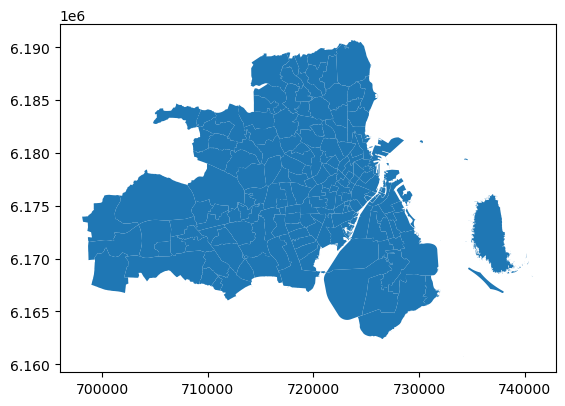

In [53]:
subset = v_cents[v_areas.StorKredsNr.isin([1,2])]
subset_areas = v_areas[v_areas.StorKredsNr.isin([1,2])]
subset_areas.plot();

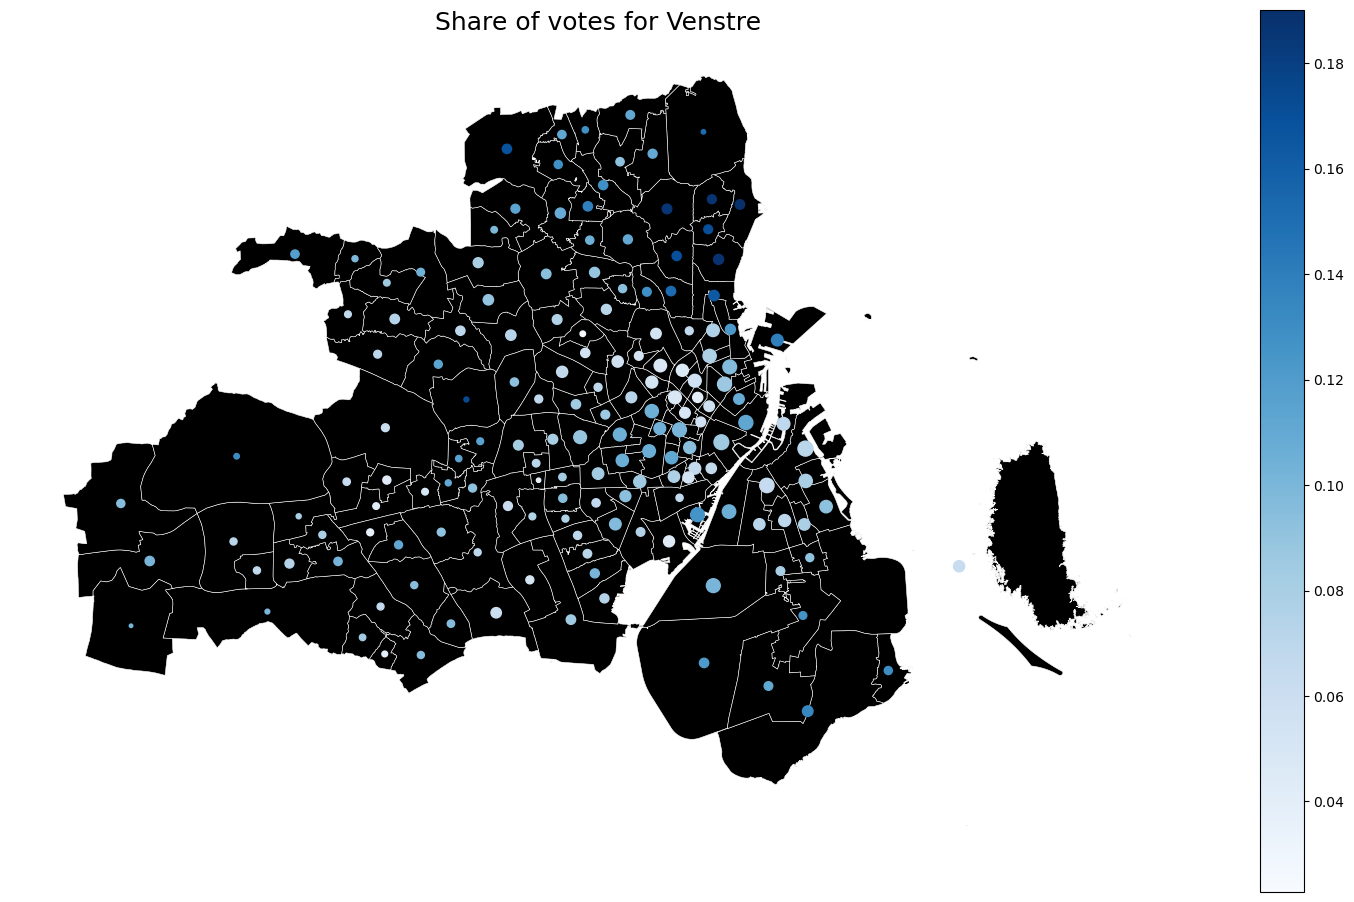

In [70]:
fig, ax = plt.subplots(figsize=(15,15))

subset_areas.plot(ax=ax, color="black", edgecolor="white", linewidth=0.4)

subset.plot(ax=ax,column='share_venstre', markersize="scaled_votes", cmap='Blues',legend=True, legend_kwds={
        #"location":"bottom",
        "shrink":0.6
    },)

ax.axis("off")

plt.title("Share of votes for Venstre",fontsize=18)

plt.tight_layout();

For interactive bubble maps, use for example *plotly express* with `scatter_mapbox()`.